In [13]:
import tensorflow as tf
import pandas as pd
import matplotlib as mp
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [15]:
data_dir = 'data'

In [17]:
image_exts = ['jpeg' , 'jpg' ,'bmp' , 'png']

In [19]:
os.listdir('data')

['happy', 'sad']

In [21]:
import os
from PIL import Image

data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        try:
            # Open the image file with Pillow
            with Image.open(image_path) as img:
                # Get the format of the image
                tip = img.format.lower()

                # Check if the format is in the allowed list
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
        except Exception as e:
            print('Issue with image {}: {}'.format(image_path, str(e)))
            # Uncomment the next line if you want to remove the problematic image
            # os.remove(image_path)


In [23]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2129 files belonging to 2 classes.


In [25]:
data_iterator = data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

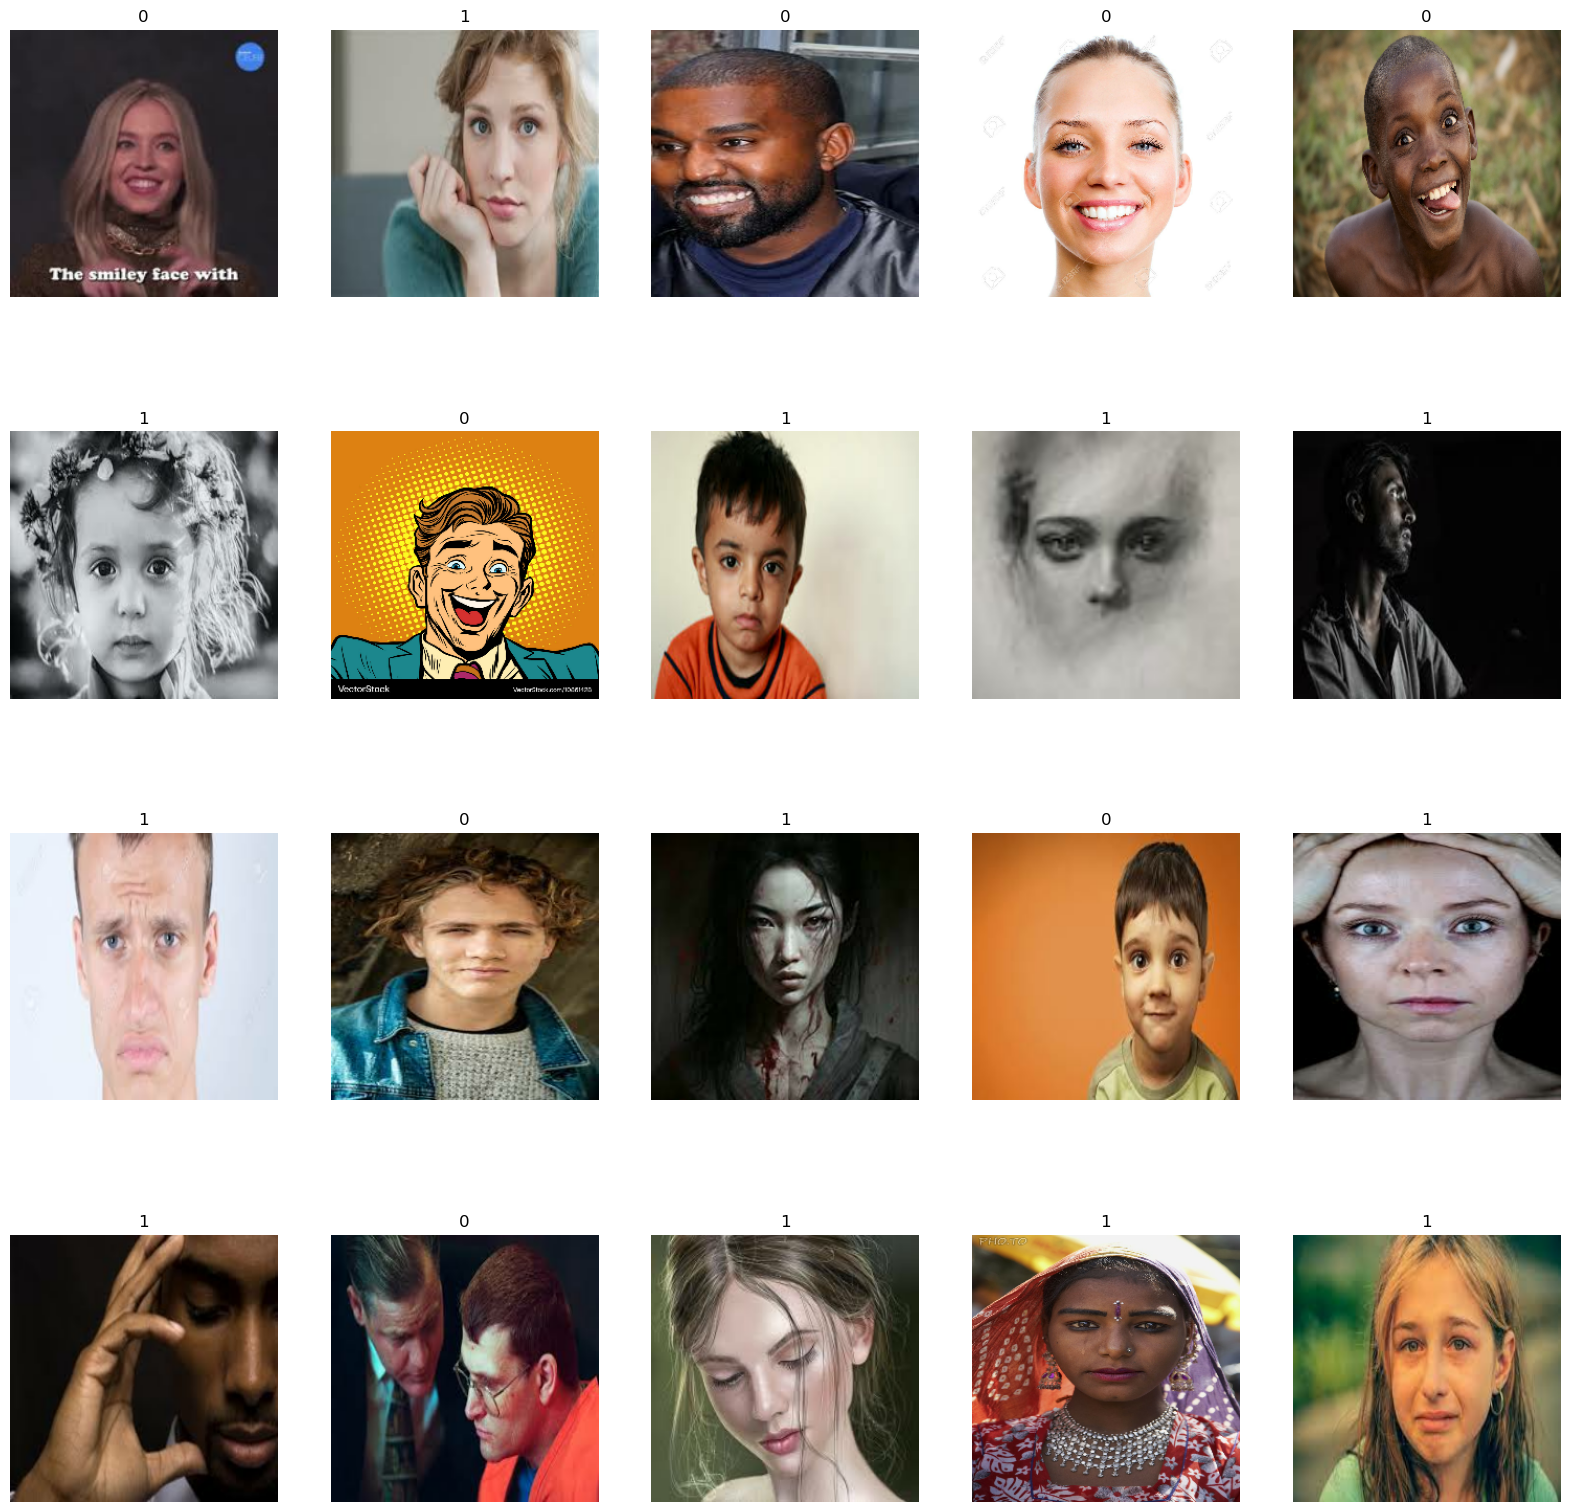

In [29]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:20]):
    ax[idx//5, idx%5].imshow(img.astype(int))
    ax[idx//5, idx%5].title.set_text(batch[1][idx])
    ax[idx//5, idx%5].axis('off')

In [31]:
data = data.map(lambda x,y: (x/255,y))

In [33]:
data.as_numpy_iterator().next()

(array([[[[0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          ...,
          [0.00989583, 0.00989583, 0.00989583],
          [0.0114277 , 0.0114277 , 0.0114277 ],
          [0.01176471, 0.01176471, 0.01176471]],
 
         [[0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          ...,
          [0.00989583, 0.00989583, 0.00989583],
          [0.0114277 , 0.0114277 , 0.0114277 ],
          [0.01176471, 0.01176471, 0.01176471]],
 
         [[0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          ...,
          [0.00989583, 0.00989583, 0.00989583],
          [0.0114277 , 0.0114277 , 0.0114277 ],
          [0.01176471, 0.01176471, 0.01176471]],
 
         ...,
 
         [[0.378125  , 0.378125  , 0.378125  ],
          [0.38786

In [35]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [41]:
model = Sequential()

In [43]:
model = Sequential([
    Input(shape=(256, 256, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' and adjust units for multi-class classification
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,770,145 (56.34 MB)

 Trainable params: 14,769,921 (56.34 MB)

 Non-trainable params: 224 (896.00 B)

In [45]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,770,145 (56.34 MB)

 Trainable params: 14,769,921 (56.34 MB)

 Non-trainable params: 224 (896.00 B)

In [49]:
logdir = 'logs'

In [51]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [53]:
hist = model.fit(train,epochs=30,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5808 - loss: 6.8485 - val_accuracy: 0.6034 - val_loss: 1.4746
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6332 - loss: 1.4560 - val_accuracy: 0.5577 - val_loss: 2.9590
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6499 - loss: 1.3691 - val_accuracy: 0.6274 - val_loss: 2.6845
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6970 - loss: 0.7050 - val_accuracy: 0.6082 - val_loss: 5.8537
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7283 - loss: 0.6352 - val_accuracy: 0.5938 - val_loss: 3.9986
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7554 - loss: 0.5542 - val_accuracy: 0.6370 - val_loss: 2.7077
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7641 - loss: 0.5323 - val_accuracy: 0.5913 - val_loss: 3.8973
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8083 - loss: 0.4359 - val_accuracy: 0.6322 - val_loss:

In [55]:
from tensorflow.keras.models import load_model

In [57]:
model.save('my_model.keras')